<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/TF_pjt_7_Redes_Convolucionais_Classifica%C3%A7%C3%A3o_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Libs**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Carregando a Base de Dados**

Carregando a base de dados direto do Google drive, pois se carregá-los na pasta de 'sample_data' demorará muito, pois a base de treino é muito grande.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGEBM/Treinamento_TensorFlow/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGEBM/Treinamento_TensorFlow/fashion-mnist-test.csv', sep = ',')

**Visualizando a Base**

Os pixels são tabelados com valores entre 0 e 255.
<br>
Valor 0 é preto.
<br>
Valores mais próximos de 255 é branco.

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

**Descrevendo os Labels**
<br>
0 = T-Shirt
<br>
1 = Trouser
<br>
2 = Pullover
<br>
3 = Dress
<br>
4 = Coat
<br>
5 = Sandal
<br>
6 = Shirt
<br>
7 = Sneeker
<br>
8 = Bag
<br>
9 = Ankle boot

Visualizando a imagem

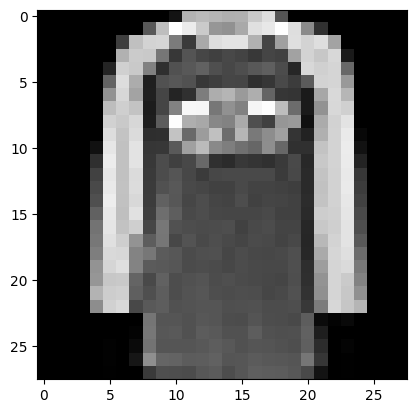

In [ ]:
i = random.randint(1, 6000)
plt.imshow(training[i, 1:].reshape((28, 28)), cmap = 'gray'); # sorteia um linha e pega todas as colunas, menos a 1ª que a coluna do 'label'

Identificando o 'label' da imagem

In [ ]:
label = training[i, 0]
label

0.0

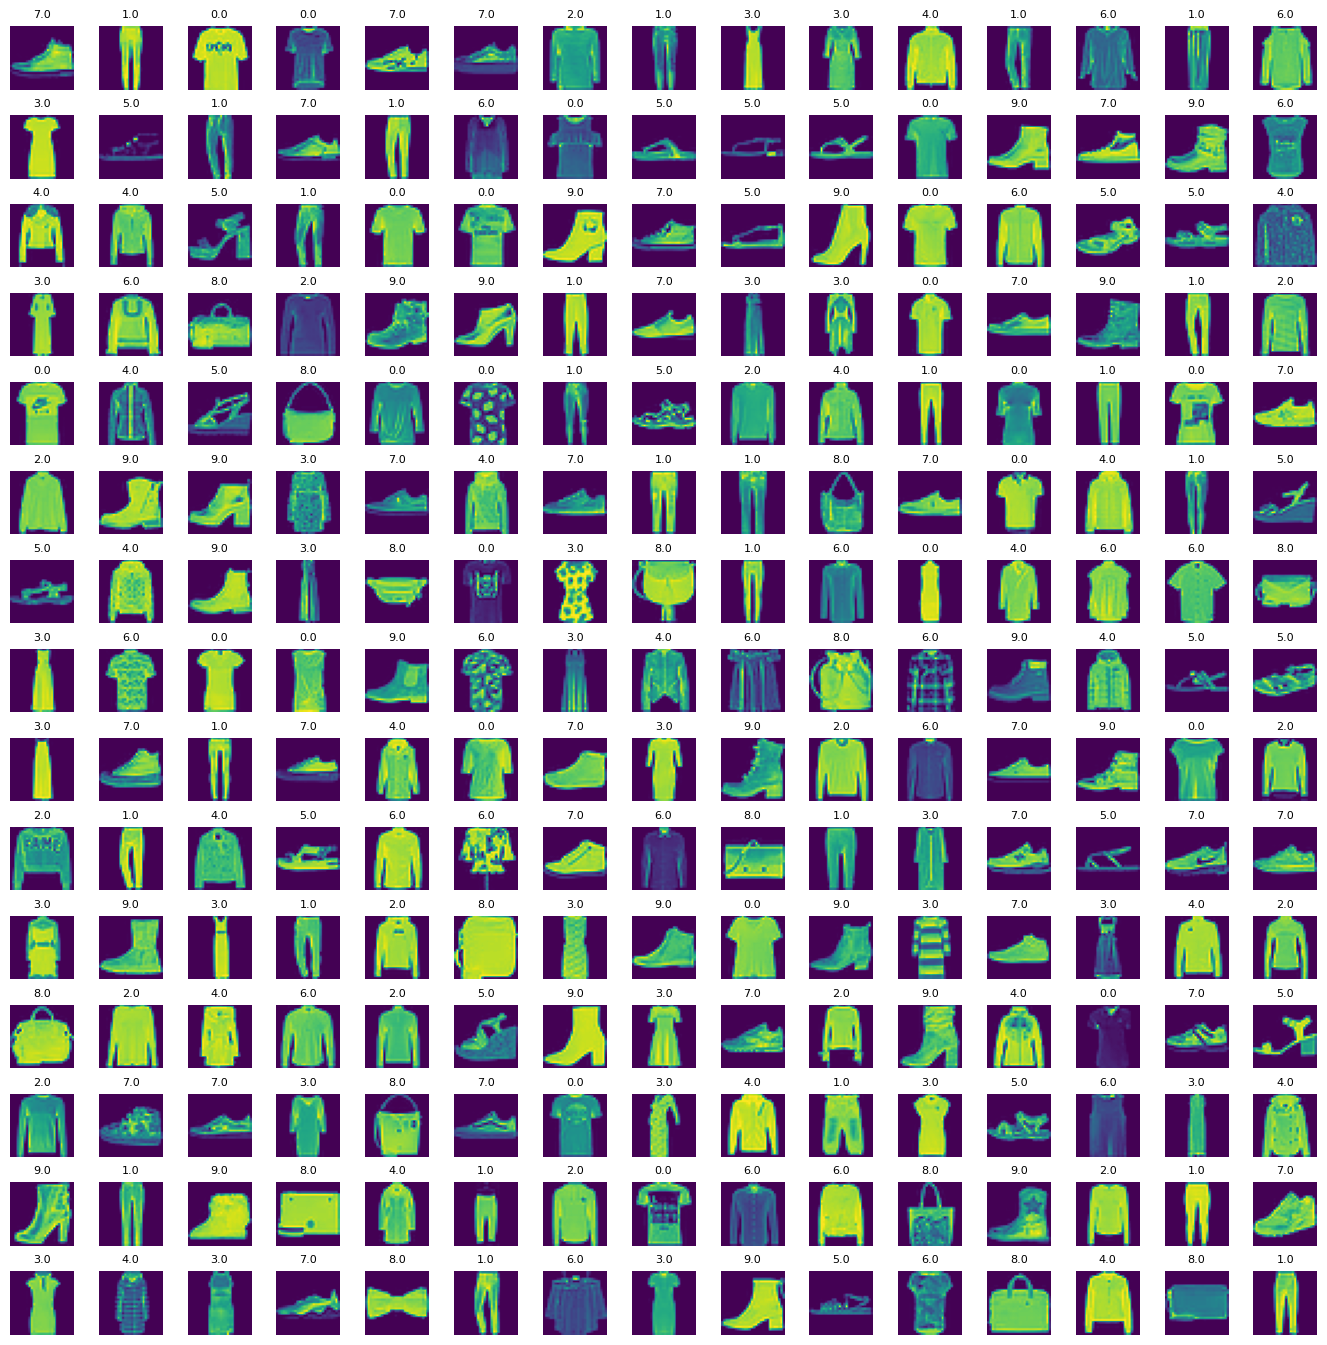

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel()
n_training = len(training)

for j in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[j].imshow(training[index, 1:].reshape((28, 28)))
  axes[j].set_title(training[index, 0], fontsize = 8)
  axes[j].axis('off')

plt.subplots_adjust(hspace = 0.4)

**Tratamento da Base**

A normalização dos valores dos pixels deve ocorrer, pois para o processamento da rede neural, a base com valores entre 0 e 1 fazer o algorítmo rodar mais rápido.

In [ ]:
X_train = training[:,1:] / 255 # normalizando
y_train = training[:, 0]

In [ ]:
X_test = testing[:,1:] / 255 # normalizando
y_test = testing[:, 0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

Para a REDE NEURAL CONVOLUCIONAL são necessários os parâmentro de altura, largura e cor. Por isso, o 'X_train' e 'X_test' saíram de shape (x, y) para shape (x, y, z, w), onde:
<br>
x = número de registros;
<br>
y e z = altura e largura, respectivamente;
<br>
w = escala de cinza.
<br>
Se fosse imagem colorida, a cor receberia 3 parâmetros(RGB), ao invés de somente 1, como no caso de tons de cinza (w)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

**Construção e Treinamento do Modelo**

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
cnn = models.Sequential()
# 1ª camada de convolução
cnn.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))
# 2ª camada de convolução
cnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2, 2))
# 3ª camada de convolução
cnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

# Camada de sáida
# 10 nós de saída, pois são 10 labels para as roupas
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Avaliação do Modelo**

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Avaliar o modelo treinado com a base de teste (X_test / y_test)

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.7750 - accuracy: 0.9140


In [ ]:
evaluation

[0.7749573588371277, 0.9139999747276306]

Valores de [ loss, accuracy ]

In [ ]:
predict_x = cnn.predict(X_test)
predicted_classes = np.argmax(predict_x, axis=1)

313/313 [==============================] - 3s 10ms/step


In [ ]:
# Vai retornar o índice do maior valor do vetor
 np.argmax(predict_x[3])

2

In [ ]:
predict_x[3]

array([1.5835590e-11, 2.5413131e-17, 9.9999994e-01, 1.1959238e-26,
       1.0115151e-27, 5.3181077e-34, 2.6904858e-14, 0.0000000e+00,
       7.6800711e-35, 2.1686623e-19], dtype=float32)

In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test[0]

0.0

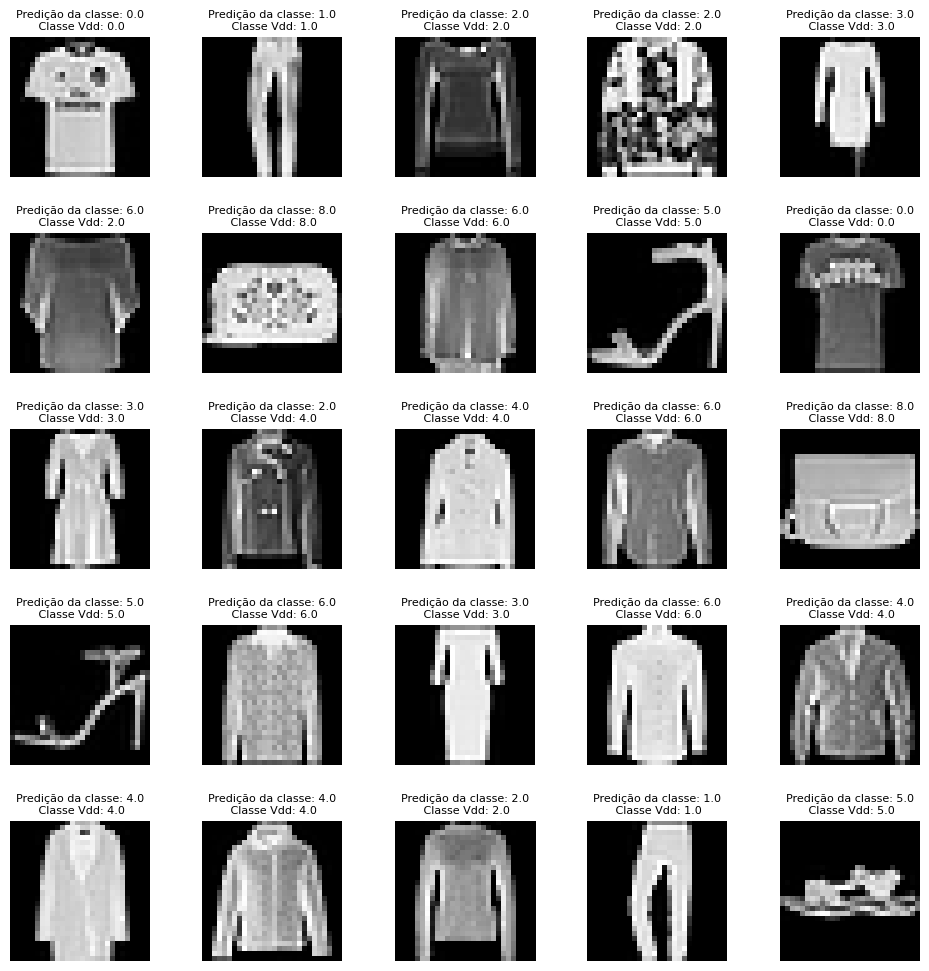

In [ ]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12, 12))
axes = axes.ravel()


for j in np.arange(0, W_grid * L_grid):
    axes[j].imshow(X_test[j].reshape((28, 28)), cmap = 'gray')
    axes[j].set_title("Predição da classe: {:0.1f}\n Classe Vdd: {:0.1f}".format(predicted_classes[j], y_test[j]), fontsize = 8)
    axes[j].axis('off')

plt.subplots_adjust(hspace = 0.4)

**Descrevendo os Labels**
<br>
0 = T-Shirt
<br>
1 = Trouser
<br>
2 = Pullover
<br>
3 = Dress
<br>
4 = Coat
<br>
5 = Sandal
<br>
6 = Shirt
<br>
7 = Sneeker
<br>
8 = Bag
<br>
9 = Ankle boot

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True);

In [ ]:
cm

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Classes {}".format(j) for j in range(num_classes)]
target_names

In [ ]:
print(classification_report(y_test, predicted_classes, target_names = target_names))